In [1]:
# Add root dir to sys.path
import sys
from pathlib import Path

# print(Path.cwd().parent)
sys.path.append(str(Path.cwd().parent))  # or adjust as needed

import numpy as np
import pandas as pd


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from src.core.backprop import BackProp
from src.core.layers import NeuNet
from src.core.feed_forward import FeedForward
from src.core.learner import Learner
from src.utils.loss_functions import binary_cross_entropy, mean_squared_error
from src.utils.data_randomize import df_random

# resolve paths
# curr_script_path = Path.cwd()
curr_folder_path = Path.cwd()
root_folder_path = curr_folder_path.parent
# root_folder_path = curr_folder_path.parent
data_folder = root_folder_path / "data/data_to_test"

rand_df = df_random(pd.read_csv(str(data_folder)+"/binary_classification_data_4_f.csv"))
# rand_df = pd.read_csv(str(data_folder)+"/binary_classification_data.csv")

In [3]:
rand_df

,Unnamed: 0,x_0,x_1,x_2,x_3,y
137,137,2.002646,1.908878,2.126248,1.357724,1.0
58,58,-0.317161,-0.573734,-0.791469,-0.239828,0.0
84,84,0.744126,0.312616,0.143172,0.019315,0.0
164,164,1.748592,1.635478,1.775917,2.359992,1.0
15,15,0.166837,0.401228,-0.205025,0.047176,0.0
...,...,...,...,...,...,...
167,167,1.603441,2.308443,2.539597,2.009640,1.0
70,70,0.364545,0.460429,0.199523,0.140221,0.0
154,154,2.169452,1.660987,2.112804,1.992571,1.0
18,18,0.156534,0.307040,1.129654,-0.030813,0.0


In [4]:
tr_X = rand_df.iloc[:, 1:5]
tr_X = np.array(tr_X)
tr_y = rand_df.iloc[:, -1]
tr_y = np.array(tr_y)
tr_y = tr_y.reshape(tr_y.shape[0], 1)

In [5]:
tr_y

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],

In [6]:


net = NeuNet(tr_X, tr_y)
net.input_layer()
net.add_hidden_layer(2, "sigmoid")
net.output_layer(1, "sigmoid")
net.initialize_weights()

ff = FeedForward(net)
bp = BackProp(forward_pass=ff, learning_rate=0.0001, loss_function="binary_cross_entropy")
epoch = 100
tr = Learner(backprop=bp, epoch=epoch)
loss = tr.train()


INFO:root:Loss - 1.2340193149383998
INFO:root:Epoch: 0 - Average Loss: 1.2340193149383998


INFO:root:Loss - 1.2211453089234772
INFO:root:Epoch: 1 - Average Loss: 1.2211453089234772
INFO:root:Loss - 1.2069881352760952
INFO:root:Epoch: 2 - Average Loss: 1.2069881352760952
INFO:root:Loss - 1.1930906032361654
INFO:root:Epoch: 3 - Average Loss: 1.1930906032361654
INFO:root:Loss - 1.1794519490532152
INFO:root:Epoch: 4 - Average Loss: 1.1794519490532152
INFO:root:Loss - 1.166071109180954
INFO:root:Epoch: 5 - Average Loss: 1.166071109180954
INFO:root:Loss - 1.1529467353024736
INFO:root:Epoch: 6 - Average Loss: 1.1529467353024736
INFO:root:Loss - 1.140077211022865
INFO:root:Epoch: 7 - Average Loss: 1.140077211022865
INFO:root:Loss - 1.1274606698805254
INFO:root:Epoch: 8 - Average Loss: 1.1274606698805254
INFO:root:Loss - 1.115095014336119
INFO:root:Epoch: 9 - Average Loss: 1.115095014336119
INFO:root:Loss - 1.10297793541279
INFO:root:Epoch: 10 - Average Loss: 1.10297793541279
INFO:root:Loss - 1.0911069326818275
INFO:root:Epoch: 11 - Average Loss: 1.0911069326818275
INFO:root:Loss - 1

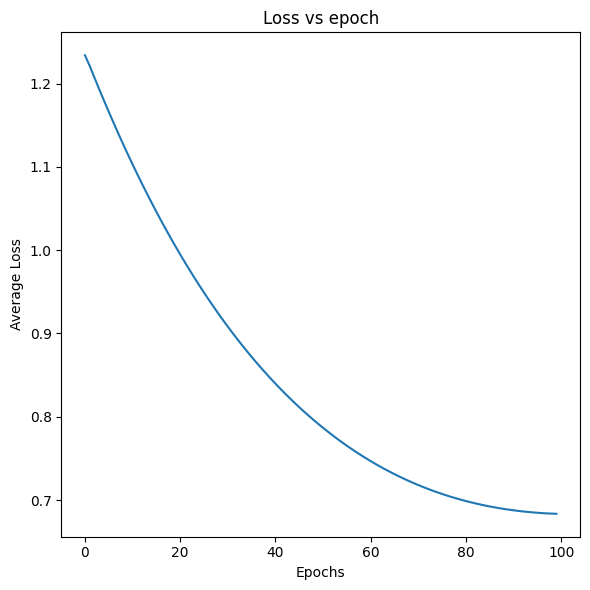

In [7]:
tr.plot_loss()


In [12]:
from math import ceil

ceil(300* 0.667)

201

In [11]:
300* 0.667

200.10000000000002